In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import optimize

In [2]:
colors = ['salmon','dodgerblue','mediumseagreen']
colors = ['#FFA0A0','#1e90ff','#3cb371']
colors_light = ['#FFEDED','#6BDDFF','#89FFBE']

# N=8

In [3]:
# Exact total energy from ED
K_SF_exact = -15.860014702364685   # U/t=0.5
K_PT_exact = -13.817614029746316    # U/t=3.3
K_MOTT_exact = -6.311971443266589  # U/t=10.0

In [4]:
# U/t=0.5
data_SF = np.loadtxt('../ProcessedData/1D_8_8_4_0.500000_1.000000_betas_10000_K.dat')
betas = data_SF[:,0]
K_SF = data_SF[:,1]
K_SF_err = data_SF[:,2]

# Calculate relative error between exact and estimate K
K_SF_relErr = np.abs((K_SF-K_SF_exact)/K_SF_exact)
K_SF_relErr_err = np.abs(K_SF_err / K_SF_exact)

# U/t=3.3
data_PT = np.loadtxt('../ProcessedData/1D_8_8_4_3.300000_1.000000_betas_10000_K.dat')
betas = data_PT[:,0]
K_PT = data_PT[:,1]
K_PT_err = data_PT[:,2]

# Calculate relative error between exact and estimate K
K_PT_relErr = np.abs((K_PT-K_PT_exact)/K_PT_exact)
K_PT_relErr_err = np.abs(K_PT_err / K_PT_exact)

# U/t=10.0
data_MOTT = np.loadtxt('../ProcessedData/1D_8_8_4_10.000000_1.000000_betas_10000_K.dat')
betas = data_MOTT[:,0]
K_MOTT = data_MOTT[:,1]
K_MOTT_err = data_MOTT[:,2]

# Calculate relative error between exact and estimate K
K_MOTT_relErr = np.abs((K_MOTT-K_MOTT_exact)/K_MOTT_exact)
K_MOTT_relErr_err = np.abs(K_MOTT_err / K_MOTT_exact)

In [5]:
# Exact total energy from ED
V_SF_exact = 1.4164745420770473   # U/t=0.5
V_PT_exact = 5.3066065551194335    # U/t=3.3
V_MOTT_exact = 3.1384353992551985  # U/t=10.0

In [6]:
# U/t=0.5
data_SF = np.loadtxt('../ProcessedData/1D_8_8_4_0.500000_1.000000_betas_10000_V.dat')
betas = data_SF[:,0]
V_SF = data_SF[:,1]
V_SF_err = data_SF[:,2]

# Calculate relative error between exact and estimate K
V_SF_relErr = np.abs((V_SF-V_SF_exact)/V_SF_exact)
V_SF_relErr_err = np.abs(V_SF_err / V_SF_exact)

# U/t=3.3
data_PT = np.loadtxt('../ProcessedData/1D_8_8_4_3.300000_1.000000_betas_10000_V.dat')
betas = data_PT[:,0]
V_PT = data_PT[:,1]
V_PT_err = data_PT[:,2]

# Calculate relative error between exact and estimate K
V_PT_relErr = np.abs((V_PT-V_PT_exact)/V_PT_exact)
V_PT_relErr_err = np.abs(V_PT_err / V_PT_exact)

# U/t=10.0
data_MOTT = np.loadtxt('../ProcessedData/1D_8_8_4_10.000000_1.000000_betas_10000_V.dat')
betas = data_MOTT[:,0]
V_MOTT = data_MOTT[:,1]
V_MOTT_err = data_MOTT[:,2]

# Calculate relative error between exact and estimate K
V_MOTT_relErr = np.abs((V_MOTT-V_MOTT_exact)/V_MOTT_exact)
V_MOTT_relErr_err = np.abs(V_MOTT_err / V_MOTT_exact)

In [7]:
# Combined plot

In [8]:
from matplotlib import gridspec

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


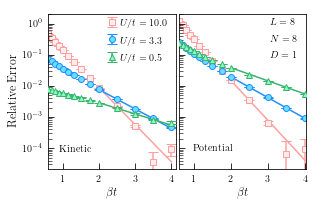

In [9]:
with plt.style.context('../IOP_large.mplstyle'):

    # Kinetic energies subplot
    fig, ax = plt.subplots(1,2,sharey=True)
    ax3 = ax[0]
    
    ax3.set_yscale("log")

    # U/t=10.0
    ax3.errorbar(betas,K_MOTT_relErr, yerr=K_MOTT_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=10.0$',color=colors[0],mfc=colors_light[0],marker='s',zorder=1)
    # U/t=3.3
    ax3.errorbar(betas,K_PT_relErr, yerr=K_PT_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=3.3$',color=colors[1],mfc=colors_light[1],marker='o',zorder=2)
    # U/t=0.5
    ax3.errorbar(betas,K_SF_relErr, yerr=K_SF_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=0.5$',color=colors[2],mfc=colors_light[2],marker='^',zorder=3)
    
    ax3.annotate(r"$\rm{Kinetic}$",(0.183,0.26),xycoords='figure fraction',fontsize=10)

    
     # Perform single exponential fits
    def exponential(x, c1, c2):
        return c1*np.exp(-x*c2)
    

    # U/t=10.0
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential,
                                                              betas[9:], 
                                                              K_MOTT_relErr[9:],
                                                              sigma=K_MOTT_relErr_err[9:],
                                                              p0=[1,1])
    
    # Extract fit parameters and their error
    c1,c2 = popt_exponential
    c1_err,c2_err = np.sqrt(np.diag(pcov_exponential))   
    
    betas_fit = np.linspace(2.0,4.0,1000)
    y_fit = c1*np.exp(-betas_fit*c2)
    ax3.plot(betas_fit,y_fit,color=colors[0],zorder=0)
    
    # U/t=3.3
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential,
                                                              betas[9:], 
                                                              K_PT_relErr[9:],
                                                              sigma=K_PT_relErr_err[9:],
                                                              p0=[1,1])
    
    # Extract fit parameters and their error
    c1,c2 = popt_exponential
    c1_err,c2_err = np.sqrt(np.diag(pcov_exponential))   
    
    betas_fit = np.linspace(2.0,4.0,1000)
    y_fit = c1*np.exp(-betas_fit*c2)
    ax3.plot(betas_fit,y_fit,color=colors[1],zorder=0)
    
    # U/t=0.5
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential,
                                                              betas[9:], 
                                                              K_SF_relErr[9:],
                                                              sigma=K_SF_relErr_err[9:],
                                                              p0=[1,1])
    
    # Extract fit parameters and their error
    c1,c2 = popt_exponential
    c1_err,c2_err = np.sqrt(np.diag(pcov_exponential))   
    
    betas_fit = np.linspace(2.0,4.0,1000)
    y_fit = c1*np.exp(-betas_fit*c2)
    ax3.plot(betas_fit,y_fit,color=colors[2],zorder=0)

    ax3.set_xlabel(r'$\beta t$')
    ax3.set_ylabel(r'$\rm{Relative} \; \rm{Error}$')
    ax3.axhline(0,color="#888888",zorder=-1)
    ax3.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
    ax3.tick_params(direction='in',which='both')

    # Set plot limits
    ax3.set_xlim(np.min(betas)*0.99,np.max(betas)*1.03)

    # Potential energies plot (bottom)
    ax4 = ax[1]
    ax4.set_yscale("log")
    
    # Add anotation with sysem information
    ax4.annotate(r"$L=8$",(0.84,0.40+0.478),xycoords='figure fraction',fontsize=10)
    ax4.annotate(r"$N=8$",(0.84,0.32+0.478),xycoords='figure fraction',fontsize=10)
    ax4.annotate(r"$D=1$",(0.84,0.24+0.478),xycoords='figure fraction',fontsize=10)
    ax4.annotate(r"$\rm{Potential}$",(0.60,0.26),xycoords='figure fraction',fontsize=10)


    # U/t=10.0
    ax4.errorbar(betas,V_MOTT_relErr, yerr=V_MOTT_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=10.0$',color=colors[0],mfc=colors_light[0],marker='s',zorder=1)
    # U/t=3.3
    ax4.errorbar(betas,V_PT_relErr, yerr=V_PT_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=3.3$',color=colors[1],mfc=colors_light[1],marker='o',zorder=2)
    # U/t=0.5
    ax4.errorbar(betas,V_SF_relErr, yerr=V_SF_relErr_err, fmt='.', capsize=5,
                label=r'$U/t=0.5$',color=colors[2],mfc=colors_light[2],marker='^',zorder=3)
    
    # U/t=10.0
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential,
                                                              betas[9:], 
                                                              V_MOTT_relErr[9:],
                                                              sigma=V_MOTT_relErr_err[9:],
                                                              p0=[1,1])
    
    # Extract fit parameters and their error
    c1,c2 = popt_exponential
    c1_err,c2_err = np.sqrt(np.diag(pcov_exponential))   
    
    betas_fit = np.linspace(2.0,4.0,1000)
    y_fit = c1*np.exp(-betas_fit*c2)
    ax4.plot(betas_fit,y_fit,color=colors[0],zorder=0)
    
    # U/t=3.3
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential,
                                                              betas[9:], 
                                                              V_PT_relErr[9:],
                                                              sigma=V_PT_relErr_err[9:],
                                                              p0=[1,1])
    
    # Extract fit parameters and their error
    c1,c2 = popt_exponential
    c1_err,c2_err = np.sqrt(np.diag(pcov_exponential))   
    
    betas_fit = np.linspace(2.0,4.0,1000)
    y_fit = c1*np.exp(-betas_fit*c2)
    ax4.plot(betas_fit,y_fit,color=colors[1],zorder=0)
    
    # U/t=0.5
    popt_exponential, pcov_exponential = scipy.optimize.curve_fit(exponential,
                                                              betas[9:], 
                                                              V_SF_relErr[9:],
                                                              sigma=V_SF_relErr_err[9:],
                                                              p0=[1,1])
    
    # Extract fit parameters and their error
    c1,c2 = popt_exponential
    c1_err,c2_err = np.sqrt(np.diag(pcov_exponential))   
    
    betas_fit = np.linspace(2.0,4.0,1000)
    y_fit = c1*np.exp(-betas_fit*c2)
    ax4.plot(betas_fit,y_fit,color=colors[2],zorder=0)

    ax4.set_xlabel(r'$\beta t$')
    ax4.axhline(0,color="#888888",zorder=-1)
    ax4.set_xlim(betas[0]-0.01*betas[0],betas[-1]+0.01*betas[-1])
    ax4.tick_params(direction='in',which='both')
    
    # Adjust vertical space between subplots
    fig.subplots_adjust(wspace=0.023)
    
    #Legend
    lgnd = plt.legend(loc=(-0.55,0.65), fontsize=10, handlelength=0,handleheight=1.5,title=r'',frameon=False)
    lgnd.get_title().set_fontsize(10)
    lgnd.get_title().set_position((2.13,-1))

    # Save to code repo (this repo)
    plt.savefig("../figures/relativeErrorsVK_N8.pdf",dpi=400)
    plt.savefig("../figures/relativeErrorsVK_N8.svg",dpi=400)
    
    # Save to paper repo
    plt.savefig("/Users/ecasiano/Desktop/papers-latticepigs/Figures/relativeErrorsVK_N8.pdf",dpi=400)
    plt.savefig("/Users/ecasiano/Desktop/papers-latticepigs/Figures/relativeErrorsVK_N8.svg",dpi=400)